In [1]:
import os
import numpy as np
import scipy
from collections import Counter
import sys
from IPython.display import SVG
import time
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools
import matplotlib as ml
import re

In [2]:
%matplotlib inline
from matplotlib import gridspec
#font = {'family' : 'Sans', 'weight' : 'normal','size': 16}
font = {'weight' : 'normal','size': 16}
ml.rc('font', **font)
#ml.rcParams['figure.figsize'] = (5.0, 5.0)
ml.rcParams['text.usetex'] =False
ml.rcParams['pdf.fonttype'] = 42
ml.rcParams['ps.fonttype'] = 42
ml.rc('font', family='serif',size=12)
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True

In [13]:
dfr2=pd.read_csv("/Users/dshipilina/GitHub/GenomeVanessa/AnnotationV2/makerrun3.all.stats.gff",sep="\t",header=None)
#dfr2 = dfr2.fillna(0)
#cols = dfr2.columns.drop('chrom')
#dfr2[cols] = dfr2[cols].apply(pd.to_numeric, errors='coerce')
dfr2['feat_len']=dfr2[4]-dfr2[3]
dfr2

,0,1,2,3,4,5,6,7,8,feat_len
0,LR999929.1,maker,mRNA,5718,11172,.,+,.,ID=Vcard_DToL03995-RA;Parent=Vcard_DToL03995;N...,5454
1,LR999929.1,maker,exon,5718,5927,.,+,.,ID=Vcard_DToL03995-RA:1;Parent=Vcard_DToL03995...,209
2,LR999929.1,maker,exon,6130,6445,.,+,.,ID=Vcard_DToL03995-RA:2;Parent=Vcard_DToL03995...,315
3,LR999929.1,maker,exon,6740,6926,.,+,.,ID=Vcard_DToL03995-RA:3;Parent=Vcard_DToL03995...,186
4,LR999929.1,maker,exon,7477,7703,.,+,.,ID=Vcard_DToL03995-RA:4;Parent=Vcard_DToL03995...,226
...,...,...,...,...,...,...,...,...,...,...
175356,LR999926.1,maker,CDS,16312713,16313049,.,-,0,ID=Vcard_DToL02698-RA:cds;Parent=Vcard_DToL026...,336
175357,LR999926.1,maker,CDS,16312534,16312682,.,-,2,ID=Vcard_DToL02698-RA:cds;Parent=Vcard_DToL026...,148
175358,LR999926.1,maker,CDS,16311735,16311899,.,-,0,ID=Vcard_DToL02698-RA:cds;Parent=Vcard_DToL026...,164
175359,LR999926.1,maker,CDS,16311464,16311617,.,-,0,ID=Vcard_DToL02698-RA:cds;Parent=Vcard_DToL026...,153


(0.0, 5000.0)

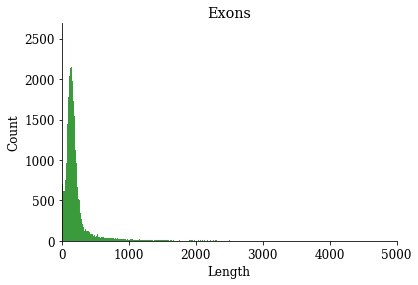

In [39]:
df_exon= dfr2.loc[dfr2[2] == 'exon']
sns.histplot(df_exon['feat_len'], color="green")
plt.ylabel('Count')
plt.xlabel('Length')
plt.title('Exons', loc='center') #, pad=20)
#plt.title(row['rep_name'], loc='center', pad=20)
plt.xlim([0,5000])

Text(0.5, 0, 'Length')

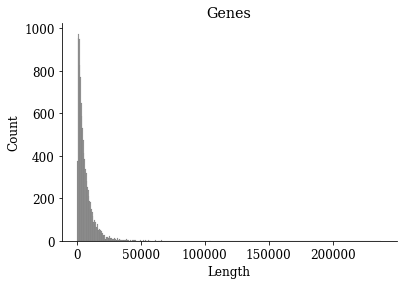

In [32]:
df_genes= dfr2.loc[dfr2[2] == 'mRNA']
sns.histplot(df_genes['feat_len'], color="grey")
plt.title('Genes', loc='center')
plt.ylabel('Count')
plt.xlabel('Length')

(0.0, 5000.0)

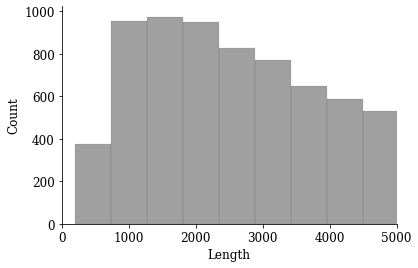

In [30]:
df_genes= dfr2.loc[dfr2[2] == 'mRNA']
sns.histplot(df_genes['feat_len'], color="grey")
plt.ylabel('Count')
plt.xlabel('Length')
plt.xlim([0,5000])

Text(0.5, 0, 'Length')

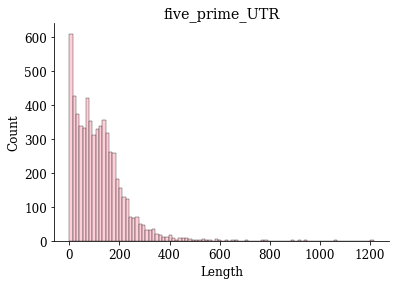

In [33]:
df_genes= dfr2.loc[dfr2[2] == 'five_prime_UTR']
sns.histplot(df_genes['feat_len'], color="pink")
plt.title('five_prime_UTR', loc='center')
plt.ylabel('Count')
plt.xlabel('Length')

Text(0.5, 0, 'Length')

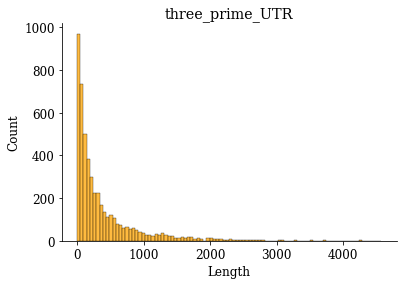

In [37]:
df_genes= dfr2.loc[dfr2[2] == 'three_prime_UTR']
sns.histplot(df_genes['feat_len'], color="orange")
plt.title('three_prime_UTR', loc='center')
plt.ylabel('Count')
plt.xlabel('Length')